In [1]:
import numpy as np 
import tensorflow as tf 
from matplotlib import pyplot as plt 

#### data

##### load data 

In [2]:
path = "./data/mnist.npz"
mnist = np.load(path)
x_train, y_train = mnist['x_train'], mnist['y_train']

##### data process

In [9]:
x = 2 * tf.convert_to_tensor(x_train, dtype=tf.float32) / 255. - 1
x = tf.reshape(x, [-1, 28 * 28])
y = tf.convert_to_tensor(y_train, dtype=tf.int32)
y =  tf.one_hot(y, depth = 10)

In [10]:
y

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

#### network

In [12]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))

w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))

w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

In [13]:
train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(100)

In [14]:
lr =0.001
losses = []

In [19]:
for epoch in range(20):
    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)

            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)

            out = h2 @ w3 + b3

            # loss
            loss = tf.square(y - out)
            loss = tf.reduce_mean(loss)

        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

        if step % 500 == 0: print(epoch, ':', step, ':', 'loss:', float(loss))
            
    losses.append(float(loss))

0 : 0 : loss: 2.3517792224884033
0 : 500 : loss: 0.21259796619415283
1 : 0 : loss: 0.19316543638706207
1 : 500 : loss: 0.14450398087501526
2 : 0 : loss: 0.13948769867420197
2 : 500 : loss: 0.11884675920009613
3 : 0 : loss: 0.1166887953877449
3 : 500 : loss: 0.10456406325101852
4 : 0 : loss: 0.10322362929582596
4 : 500 : loss: 0.09531162679195404
5 : 0 : loss: 0.09417220205068588
5 : 500 : loss: 0.08849161863327026
6 : 0 : loss: 0.08736713975667953
6 : 500 : loss: 0.08319595456123352
7 : 0 : loss: 0.08218052983283997
7 : 500 : loss: 0.07910453528165817
8 : 0 : loss: 0.07803167402744293
8 : 500 : loss: 0.07585441321134567
9 : 0 : loss: 0.0745965987443924
9 : 500 : loss: 0.07312986254692078
10 : 0 : loss: 0.07167553901672363
10 : 500 : loss: 0.07078277319669724
11 : 0 : loss: 0.0692465677857399
11 : 500 : loss: 0.06877852231264114
12 : 0 : loss: 0.06719839572906494
12 : 500 : loss: 0.06709723174571991
13 : 0 : loss: 0.0653851255774498
13 : 500 : loss: 0.06562847644090652
14 : 0 : loss: 0.

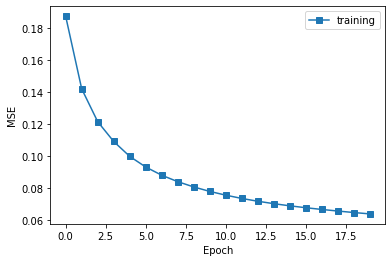

In [20]:
plt.plot(losses, marker='s',label='training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()